In [72]:
# import packages
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, date
import calendar
import matplotlib.pyplot as plt
% matplotlib inline

In [73]:
# load the table of tweets 
df = pd.read_csv("output_month_before_scandal.csv",  sep=";",engine='python', header=None, skip_blank_lines=1) # Read the folder of tweets
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')
df['Date'] = [d.date() for d in df['date']]
df['Time'] = [d.time() for d in df['date']]
df = df.drop(df.columns[[1,4,8,9]], axis=1) #drop invalid columns ('geo','nan','date')
df

,username,retweets,text,hashtags,id,permalink,Date,Time
1,PaulCuppari,0,New Beetle R-Line Joins Volkswagen R Family In...,NaN,"6,44E+17",https://twitter.com/PaulCuppari/status/6442691...,2015-09-16,23:58:00
2,yorkvolkswagen,0,Here it is. The new Volkswagen Tiguan. We cann...,NaN,"6,44E+17",https://twitter.com/yorkvolkswagen/status/6442...,2015-09-16,23:58:00
3,VWstreet,0,Here it is. The new Volkswagen Tiguan. We cann...,NaN,"6,44E+17",https://twitter.com/VWstreet/status/6442691444...,2015-09-16,23:58:00
4,ganleyman,0,My heavens...It's BEAUTIFUL! #Volkswagen #Golf...,#Volkswagen #GolfGTE #SportConcept #FrankfurtD...,"6,44E+17",https://twitter.com/ganleyman/status/644269019...,2015-09-16,23:57:00
5,LakeCityExports,0,Just in! We have recently added a 2012 Volkswa...,NaN,"6,44E+17",https://twitter.com/LakeCityExports/status/644...,2015-09-16,23:57:00
6,MotoringDeals,0,VOLKSWAGEN SCIROCCO 2.0 TDi BlueMotion Tech 3d...,NaN,"6,44E+17",https://twitter.com/MotoringDeals/status/64426...,2015-09-16,23:57:00
7,AstroDUS,0,Looking Angry #KidFlash #Volkswagen #Vdub #1st...,#KidFlash #Volkswagen #Vdub #1st_Love,"6,44E+17",https://twitter.com/AstroDUS/status/6442686495...,2015-09-16,23:56:00
8,AmazingChevVolt,0,@vwpress_en @Volkswagen @iaamesse WATCHING/ Wi...,#EV #PHEVs,"6,44E+17",https://twitter.com/AmazingChevVolt/status/644...,2015-09-16,23:55:00
9,mrjonmoore,0,Volkswagen just re-released everyone's favouri...,NaN,"6,44E+17",https://twitter.com/mrjonmoore/status/64426787...,2015-09-16,23:53:00
10,Maryam_Alisha,0,Jk my Volkswagen days been over lmaoo,NaN,"6,44E+17",https://twitter.com/Maryam_Alisha/status/64426...,2015-09-16,23:53:00


In [74]:
# get the day of week given a date
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['weekday'] = df['Date'].dt.weekday_name
df

,username,retweets,text,hashtags,id,permalink,Date,Time,weekday
1,PaulCuppari,0,New Beetle R-Line Joins Volkswagen R Family In...,NaN,"6,44E+17",https://twitter.com/PaulCuppari/status/6442691...,2015-09-16,23:58:00,Wednesday
2,yorkvolkswagen,0,Here it is. The new Volkswagen Tiguan. We cann...,NaN,"6,44E+17",https://twitter.com/yorkvolkswagen/status/6442...,2015-09-16,23:58:00,Wednesday
3,VWstreet,0,Here it is. The new Volkswagen Tiguan. We cann...,NaN,"6,44E+17",https://twitter.com/VWstreet/status/6442691444...,2015-09-16,23:58:00,Wednesday
4,ganleyman,0,My heavens...It's BEAUTIFUL! #Volkswagen #Golf...,#Volkswagen #GolfGTE #SportConcept #FrankfurtD...,"6,44E+17",https://twitter.com/ganleyman/status/644269019...,2015-09-16,23:57:00,Wednesday
5,LakeCityExports,0,Just in! We have recently added a 2012 Volkswa...,NaN,"6,44E+17",https://twitter.com/LakeCityExports/status/644...,2015-09-16,23:57:00,Wednesday
6,MotoringDeals,0,VOLKSWAGEN SCIROCCO 2.0 TDi BlueMotion Tech 3d...,NaN,"6,44E+17",https://twitter.com/MotoringDeals/status/64426...,2015-09-16,23:57:00,Wednesday
7,AstroDUS,0,Looking Angry #KidFlash #Volkswagen #Vdub #1st...,#KidFlash #Volkswagen #Vdub #1st_Love,"6,44E+17",https://twitter.com/AstroDUS/status/6442686495...,2015-09-16,23:56:00,Wednesday
8,AmazingChevVolt,0,@vwpress_en @Volkswagen @iaamesse WATCHING/ Wi...,#EV #PHEVs,"6,44E+17",https://twitter.com/AmazingChevVolt/status/644...,2015-09-16,23:55:00,Wednesday
9,mrjonmoore,0,Volkswagen just re-released everyone's favouri...,NaN,"6,44E+17",https://twitter.com/mrjonmoore/status/64426787...,2015-09-16,23:53:00,Wednesday
10,Maryam_Alisha,0,Jk my Volkswagen days been over lmaoo,NaN,"6,44E+17",https://twitter.com/Maryam_Alisha/status/64426...,2015-09-16,23:53:00,Wednesday


In [ ]:
# get different parts of the day
def time_of_day (hour):
    if hour>=1 and  hour<=6:
        return 'night'
    elif hour>=7 and hour<=12:
        return 'morning'
    elif hour>=13 and hour<=18:
        return 'afternoon'
    else:
        return 'evening'


In [83]:
df['hour'] = df['Time'].map(lambda x : str(x).split(':')).map(lambda x:int(x[0]))
df['time_of_day'] = df['hour'].map(lambda x : time_of_day (x))
df

,username,retweets,text,hashtags,id,permalink,Date,Time,weekday,hour,time_of_day
1,PaulCuppari,0,New Beetle R-Line Joins Volkswagen R Family In...,NaN,"6,44E+17",https://twitter.com/PaulCuppari/status/6442691...,2015-09-16,23:58:00,Wednesday,23,evening
2,yorkvolkswagen,0,Here it is. The new Volkswagen Tiguan. We cann...,NaN,"6,44E+17",https://twitter.com/yorkvolkswagen/status/6442...,2015-09-16,23:58:00,Wednesday,23,evening
3,VWstreet,0,Here it is. The new Volkswagen Tiguan. We cann...,NaN,"6,44E+17",https://twitter.com/VWstreet/status/6442691444...,2015-09-16,23:58:00,Wednesday,23,evening
4,ganleyman,0,My heavens...It's BEAUTIFUL! #Volkswagen #Golf...,#Volkswagen #GolfGTE #SportConcept #FrankfurtD...,"6,44E+17",https://twitter.com/ganleyman/status/644269019...,2015-09-16,23:57:00,Wednesday,23,evening
5,LakeCityExports,0,Just in! We have recently added a 2012 Volkswa...,NaN,"6,44E+17",https://twitter.com/LakeCityExports/status/644...,2015-09-16,23:57:00,Wednesday,23,evening
6,MotoringDeals,0,VOLKSWAGEN SCIROCCO 2.0 TDi BlueMotion Tech 3d...,NaN,"6,44E+17",https://twitter.com/MotoringDeals/status/64426...,2015-09-16,23:57:00,Wednesday,23,evening
7,AstroDUS,0,Looking Angry #KidFlash #Volkswagen #Vdub #1st...,#KidFlash #Volkswagen #Vdub #1st_Love,"6,44E+17",https://twitter.com/AstroDUS/status/6442686495...,2015-09-16,23:56:00,Wednesday,23,evening
8,AmazingChevVolt,0,@vwpress_en @Volkswagen @iaamesse WATCHING/ Wi...,#EV #PHEVs,"6,44E+17",https://twitter.com/AmazingChevVolt/status/644...,2015-09-16,23:55:00,Wednesday,23,evening
9,mrjonmoore,0,Volkswagen just re-released everyone's favouri...,NaN,"6,44E+17",https://twitter.com/mrjonmoore/status/64426787...,2015-09-16,23:53:00,Wednesday,23,evening
10,Maryam_Alisha,0,Jk my Volkswagen days been over lmaoo,NaN,"6,44E+17",https://twitter.com/Maryam_Alisha/status/64426...,2015-09-16,23:53:00,Wednesday,23,evening


In [84]:
parts_of_day_tweets = df.groupby(by = ['time_of_day'])['text'].size().reset_index(name = 'number_of_tweets_per_parts_of_day')  #to calculate the number of tweets per day
parts_of_day_tweets

,time_of_day,number_of_tweets_per_parts_of_day
0,afternoon,14560
1,evening,13092
2,morning,9463
3,night,8698


Text(0,0.5,'number of tweets')

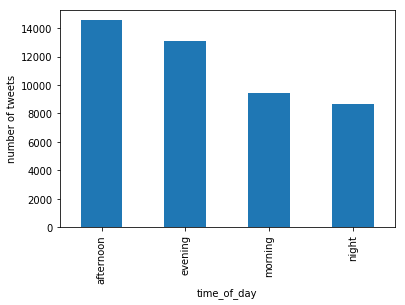

In [87]:
ax = df.groupby(by = ['time_of_day'])['id'].size().plot(kind='bar') # to plot the results
#ax.title = 'Tweet counts by day'
ax.set_xlabel("time_of_day")
ax.set_ylabel("number of tweets")

In [85]:
weekday_tweets = df.groupby(by = ['weekday'])['text'].size().reset_index(name = 'number_of_tweets_per_weekday')  #to calculate the number of tweets per day
weekday_tweets

,weekday,number_of_tweets_per_weekday
0,Friday,5451
1,Monday,7864
2,Saturday,4189
3,Sunday,4932
4,Thursday,7867
5,Tuesday,7891
6,Wednesday,7619


Text(0,0.5,'number of tweets')

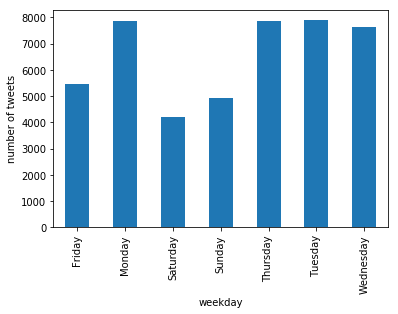

In [86]:
ax = df.groupby(by = ['weekday'])['id'].size().plot(kind='bar') # to plot the results
#ax.title = 'Tweet counts by day'
ax.set_xlabel("weekday")
ax.set_ylabel("number of tweets")